In [1]:
import pandas as pd

data_row=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/0410/train/all-mpnet-base-v2/train_data_after_vector(0419).csv",index_col=0)

data_row

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,predict
8076,0.041588,-0.036846,-0.006648,0.000227,0.007280,-0.005223,-0.041606,0.027679,0.050705,-0.010002,...,-0.044424,-0.016392,-0.022169,-0.037559,-0.057371,0.020104,0.028147,0.028788,-0.028985,0
25730,0.061660,-0.056645,-0.022031,-0.005079,0.005027,0.003676,-0.015168,0.007216,0.058704,-0.006738,...,-0.042487,-0.001710,0.009329,-0.048849,-0.043386,0.021108,0.031772,0.009500,-0.026264,0
1498,0.092370,-0.006547,-0.026442,0.029015,0.008454,0.015549,-0.066554,-0.000775,0.064377,0.010901,...,-0.021142,-0.022168,-0.001286,-0.035978,0.007039,-0.009740,0.038135,-0.008530,-0.037148,2
16178,0.059826,-0.042817,-0.032501,0.007740,0.031213,0.009300,-0.056136,0.043029,0.068339,-0.019666,...,-0.018776,-0.007381,-0.003232,-0.054016,-0.037947,0.012492,0.022637,0.034475,-0.006181,0
20633,0.076205,-0.015350,-0.022006,-0.024257,0.046556,-0.002424,-0.048548,0.041730,0.023783,-0.020854,...,-0.034089,-0.005977,-0.036172,-0.061840,-0.039963,0.011077,0.040165,0.047502,0.001249,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17673,0.072367,-0.022104,0.000954,0.003340,0.053166,0.000461,-0.094612,0.004825,0.062762,-0.012836,...,-0.018668,0.026531,-0.007416,-0.058117,-0.078507,0.007944,0.033241,0.028112,-0.015801,0
22219,0.087794,-0.054177,-0.028630,-0.003186,0.039359,0.011474,-0.019956,0.019536,0.075004,0.001278,...,0.012462,-0.034997,0.013858,-0.049586,-0.016666,0.006090,0.022115,0.014825,-0.030503,1
22386,0.053977,-0.077066,-0.027049,-0.048966,0.016413,0.006757,-0.069973,0.013895,0.044211,-0.004104,...,-0.032237,0.003306,0.026910,-0.003375,-0.011970,0.015297,0.000451,-0.005020,-0.021968,0
19829,0.048972,-0.071700,-0.025778,-0.003188,0.015020,-0.003606,-0.009128,0.014794,0.058696,0.001855,...,-0.024310,-0.004815,-0.003610,-0.035594,-0.044277,0.012951,0.028726,0.014414,-0.028533,0


In [2]:

import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")
device = torch.device("mps") 

tensor([1.], device='mps:0')


In [3]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [4]:

data_row = pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/0410/train/all-mpnet-base-v2/train_data_after_vector(0419).csv", index_col=0)
y_train = pd.get_dummies(data_row['predict']).values
X_train = data_row.drop(columns=['predict']).values

test = pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/0410/test/all-mpnet-base-v2/target_data(0419).csv", index_col=0)
test_y = pd.get_dummies(test['predict']).values
test_x = test.drop(columns=['predict']).values

In [5]:

X_train = torch.tensor(X_train, dtype=torch.float).unsqueeze(1).to(device)
y_train = torch.tensor(y_train, dtype=torch.float).to(device)
test_x = torch.tensor(test_x, dtype=torch.float).unsqueeze(1).to(device)
test_y = torch.tensor(test_y, dtype=torch.float).to(device)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(test_x.shape)
print(test_y.shape)

torch.Size([28242, 1, 768])
torch.Size([28242, 3])
torch.Size([300, 1, 768])
torch.Size([300, 3])


In [7]:

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)

test_dataset = TensorDataset(test_x, test_y)
test_loader = DataLoader(test_dataset, batch_size=20, shuffle=False)

In [8]:
class TextClassifier(nn.Module):
    def __init__(self):
        super(TextClassifier, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=X_train.shape[2], out_channels=128, kernel_size=1)  # in_channels 수정
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=1)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=1)
        self.pool = nn.MaxPool1d(kernel_size=1)
        self.dropout = nn.Dropout(0.5)
        self.lstm = nn.LSTM(input_size=32, hidden_size=128, num_layers=2, batch_first=True, bidirectional=True)
        self.fc1 = nn.Linear(128*2, 32)
        self.fc2 = nn.Linear(32, 3)
        self.activation = nn.ELU()

    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.activation(self.conv2(x))
        x = self.activation(self.conv3(x))
        x = self.pool(x)
        x = self.dropout(x)
        x = x.permute(0, 2, 1)  
        x, _ = self.lstm(x)
        x = self.dropout(x[:, -1, :])  
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


model = TextClassifier().to(device)
model.to(device)

TextClassifier(
  (conv1): Conv1d(768, 128, kernel_size=(1,), stride=(1,))
  (conv2): Conv1d(128, 64, kernel_size=(1,), stride=(1,))
  (conv3): Conv1d(64, 32, kernel_size=(1,), stride=(1,))
  (pool): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (lstm): LSTM(32, 128, num_layers=2, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=256, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=3, bias=True)
  (activation): ELU(alpha=1.0)
)

In [9]:
from torch.optim.lr_scheduler import StepLR


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=0.002,weight_decay=1e-5)
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

In [10]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

In [11]:
num_epochs = 500
training_losses = []
validation_losses = []


patience = 100 
counter = 0  
best_loss = None  

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  
        inputs = inputs.permute(0, 2, 1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, torch.max(labels, 1)[1])
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    avg_train_loss = train_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    
    
    model.eval()
    validation_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device) 
            inputs = inputs.permute(0, 2, 1)  
            outputs = model(inputs)
            loss = criterion(outputs, torch.max(labels, 1)[1])
            validation_loss += loss.item()
    
    avg_validation_loss = validation_loss / len(test_loader)
    validation_losses.append(avg_validation_loss)

    print(f'Epoch {epoch+1}, Training Loss: {avg_train_loss}, Validation Loss: {avg_validation_loss}')
    
    scheduler.step()
    
    if best_loss is None:
        best_loss = avg_validation_loss
    elif avg_validation_loss < best_loss:
        best_loss = avg_validation_loss
        counter = 0  
    else:
        counter += 1  
        if counter >= patience:  
            print("Early stopping!")
            break

print('Test Fine End')



Epoch 1, Training Loss: 0.3704859626096174, Validation Loss: 0.3081750492254893
Epoch 2, Training Loss: 0.29537929666491575, Validation Loss: 0.3150473376115163
Epoch 3, Training Loss: 0.2935665616184283, Validation Loss: 0.31228326857089994
Epoch 4, Training Loss: 0.2832793301852619, Validation Loss: 0.28733954528967537
Epoch 5, Training Loss: 0.28550038372824904, Validation Loss: 0.3170189658800761
Epoch 6, Training Loss: 0.28168100229894644, Validation Loss: 0.29345037043094635
Epoch 7, Training Loss: 0.2838944161095922, Validation Loss: 0.2916259785493215
Epoch 8, Training Loss: 0.28060284279608505, Validation Loss: 0.2896526426076889
Epoch 9, Training Loss: 0.27969216559789495, Validation Loss: 0.30705262124538424
Epoch 10, Training Loss: 0.2798495913189371, Validation Loss: 0.30120030442873635
Epoch 11, Training Loss: 0.278685081950524, Validation Loss: 0.32351245284080504
Epoch 12, Training Loss: 0.27939413994898715, Validation Loss: 0.3254181444644928
Epoch 13, Training Loss: 0

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np



torch.save(model.state_dict(), 'pytorch cnn-bilstm model_state_dict0424.pt')

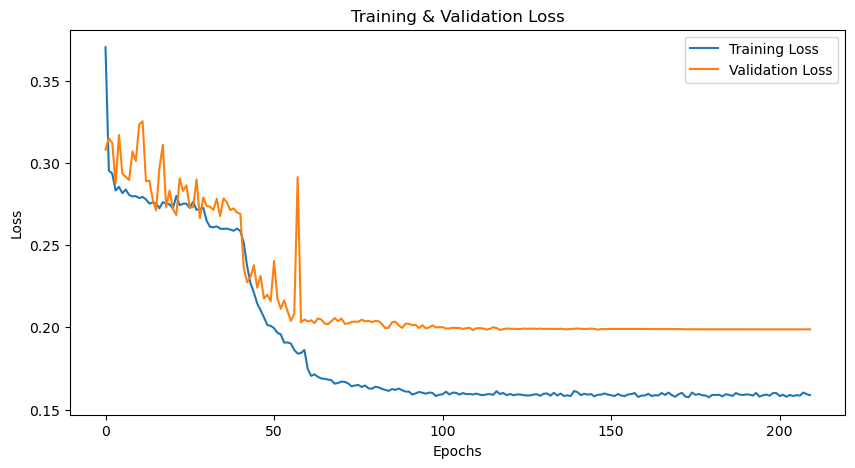

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

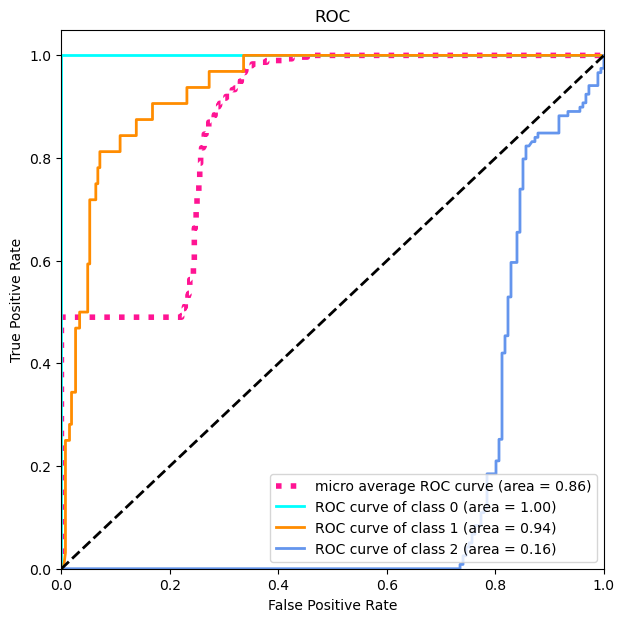

In [14]:
def plot_multiclass_roc_curve(test_y, y_score, n_classes):
   
    test_y_bin = label_binarize(test_y, classes=[*range(n_classes)])

    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    
    fpr["micro"], tpr["micro"], _ = roc_curve(test_y_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    
    plt.figure(figsize=(7, 7))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()





from sklearn.preprocessing import label_binarize

test_x = test_x.permute(0, 2, 1)  
y_score = model(test_x).detach().cpu().numpy()

test_y = test_y.detach().cpu().numpy()

plot_multiclass_roc_curve(test_y, y_score, n_classes=3)

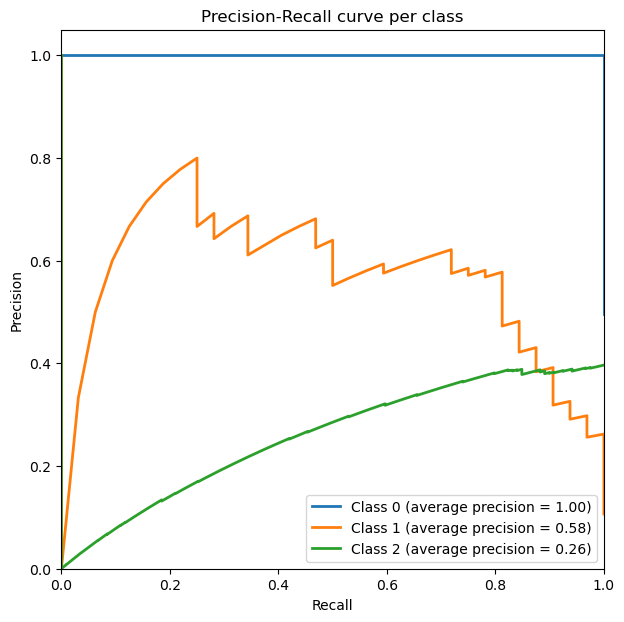

In [15]:
def plot_precision_recall_curve(test_y, y_score, n_classes):
    
    test_y = label_binarize(test_y, classes=[*range(n_classes)])
    
    
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(test_y[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(test_y[:, i], y_score[:, i])

    
    plt.figure(figsize=(7, 7))
    for i in range(n_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (average precision = {average_precision[i]:0.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve per class')
    plt.legend(loc="best")
    plt.show()
    
plot_precision_recall_curve(test_y, y_score, n_classes=3)

In [16]:

y_pred = np.argmax(y_score, axis=1)
test_y_labels = np.argmax(test_y, axis=1)  # 실제 레이블

In [17]:

accuracy = accuracy_score(test_y_labels, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.91


In [18]:
# 혼동 행렬
conf_matrix = confusion_matrix(test_y_labels, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[149   0   0]
 [  0  26   6]
 [  0  21  98]]


In [19]:
with open("CNN BILSTM confusion matrix.txt", "w") as text_file:
    print(confusion_matrix(test_y_labels, y_pred), file=text_file)

In [20]:
# 분류 보고서
class_report = classification_report(test_y_labels, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       0.55      0.81      0.66        32
           2       0.94      0.82      0.88       119

    accuracy                           0.91       300
   macro avg       0.83      0.88      0.85       300
weighted avg       0.93      0.91      0.92       300



In [21]:
with open("CNN-BILSTM output.txt", "w") as text_file:
    print(classification_report(test_y_labels, y_pred,digits=4), file=text_file)